#### Transfer Learning Modell 3
- Backbone VGG-16
- Images cropped and resized
- VGG 16 Paper preprocessing as done in Paper for Network: https://arxiv.org/abs/1409.1556

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

In [2]:
import keras
from keras_preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout

In [3]:
import tensorflow as tf

In [7]:
df = pd.read_csv('/content/drive/MyDrive/train4_small.csv')

In [8]:
df.head()

,filename,labels
0,3f58d128caf6.jpg,glaucoma
1,802b4bfabd52.jpg,md
2,7bcfab1fa2da.jpg,opacity
3,012e91949ec4.jpg,opacity
4,6386346fb595.jpg,opacity


In [9]:
# Original Images
in_dir = '/content/drive/MyDrive/four'

In [ ]:
#display(Image(in_dir+'\\'+df.filename[0]))

### Image Generator

In [10]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.25)

In [13]:
train_gen = datagen.flow_from_dataframe(dataframe = df, 
                                            directory = in_dir, 
                                            x_col = "filename", 
                                            y_col = 'labels',
                                            batch_size = 10, 
                                            seed = 2, 
                                            shuffle = True, 
                                            class_mode = "categorical", 
                                            classes = ['opacity', 'glaucoma','md', 'normal'],
                                            subset='training',
                                            target_size = (224,224))

Found 1500 validated image filenames belonging to 4 classes.


In [14]:
val_gen = datagen.flow_from_dataframe(dataframe = df, 
                                            directory = in_dir, 
                                            x_col = "filename", 
                                            y_col = 'labels',
                                            batch_size = 10, 
                                            seed = 2, 
                                            shuffle = False,#Labels nicht shuffeln für CM 
                                            class_mode = "categorical", 
                                            classes = ['opacity', 'glaucoma','md', 'normal'],
                                            subset='validation',
                                            target_size = (224,224))

Found 500 validated image filenames belonging to 4 classes.


In [15]:
imgs, labels = next(train_gen)

In [16]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


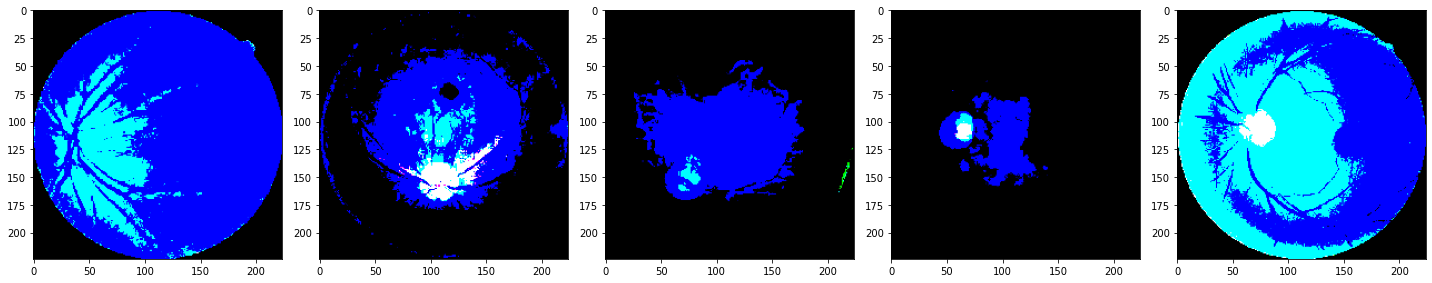

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [17]:
plotImages(imgs)
print(labels)

### Model

In [18]:
model_vgg16 = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 5s 0us/step


In [19]:
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [20]:
model = Sequential()
for layer in model_vgg16.layers[:-1]:
    model.add(layer)

In [21]:
for layer in model.layers:
    layer.trainable = False

In [22]:
model.add(Dense(units=4, activation='softmax'))

In [23]:
step_size_train = train_gen.n//train_gen.batch_size
step_size_val = val_gen.n//val_gen.batch_size

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(x=train_gen, validation_data=val_gen, steps_per_epoch=step_size_train, 
          validation_steps=step_size_val, epochs=10,verbose=2)

Epoch 1/10
150/150 - 1496s - loss: 0.9419 - accuracy: 0.6340 - val_loss: 0.9427 - val_accuracy: 0.6600
Epoch 2/10
150/150 - 26s - loss: 0.6529 - accuracy: 0.7573 - val_loss: 1.2106 - val_accuracy: 0.5560
Epoch 3/10
150/150 - 25s - loss: 0.5335 - accuracy: 0.7920 - val_loss: 1.0212 - val_accuracy: 0.6180
Epoch 4/10
150/150 - 25s - loss: 0.4874 - accuracy: 0.8120 - val_loss: 0.9635 - val_accuracy: 0.6500
Epoch 5/10
150/150 - 25s - loss: 0.4487 - accuracy: 0.8320 - val_loss: 1.8758 - val_accuracy: 0.4640
Epoch 6/10
150/150 - 25s - loss: 0.3724 - accuracy: 0.8627 - val_loss: 0.8228 - val_accuracy: 0.7060
Epoch 7/10
150/150 - 25s - loss: 0.3302 - accuracy: 0.8747 - val_loss: 1.0455 - val_accuracy: 0.6440
Epoch 8/10
150/150 - 25s - loss: 0.3190 - accuracy: 0.8767 - val_loss: 0.9001 - val_accuracy: 0.6760
Epoch 9/10
150/150 - 25s - loss: 0.3098 - accuracy: 0.8807 - val_loss: 1.4398 - val_accuracy: 0.5800
Epoch 10/10
150/150 - 25s - loss: 0.2800 - accuracy: 0.8873 - val_loss: 1.4510 - val_accu

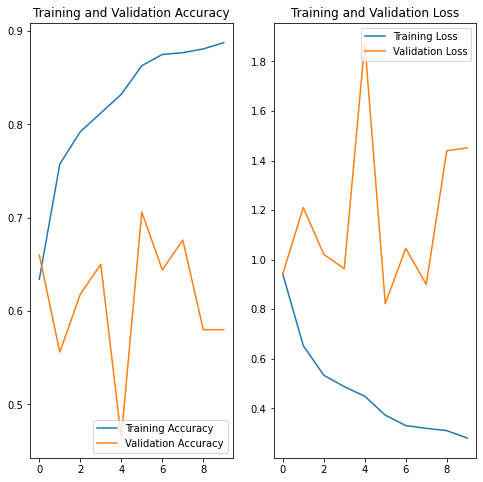

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.save('/content/drive/MyDrive/Modell_1/Transfer2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Modell_1/Transfer2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Modell_1/Transfer2/assets
